In [11]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt

tf.disable_eager_execution()

In [12]:
# Parameters
learning_rate = 0.01
epochs = 1000
display_step = 50

# Training Data
train_X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = train_X.shape[0]

In [13]:
# tf.Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(np.random.randn(), name="weights")
b = tf.Variable(np.random.randn(), name="bias")

In [14]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [18]:
cost = tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * n_samples)

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [19]:
# Initializer the variables
init = tf.global_variables_initializer()

Epoch:  50 	 cost =  0.11896739 	 W= 0.3642444 	 b =  -0.023323044
Epoch:  100 	 cost =  0.11411322 	 W= 0.3574255 	 b =  0.025731135
Epoch:  150 	 cost =  0.10981983 	 W= 0.3510122 	 b =  0.07186782
Epoch:  200 	 cost =  0.106022485 	 W= 0.3449804 	 b =  0.11526047
Epoch:  250 	 cost =  0.10266388 	 W= 0.3393073 	 b =  0.15607265
Epoch:  300 	 cost =  0.099693395 	 W= 0.3339715 	 b =  0.1944574
Epoch:  350 	 cost =  0.09706619 	 W= 0.32895324 	 b =  0.2305591
Epoch:  400 	 cost =  0.094742626 	 W= 0.3242334 	 b =  0.26451334
Epoch:  450 	 cost =  0.092687584 	 W= 0.3197942 	 b =  0.2964486
Epoch:  500 	 cost =  0.09087016 	 W= 0.315619 	 b =  0.3264844
Epoch:  550 	 cost =  0.08926279 	 W= 0.31169218 	 b =  0.3547337
Epoch:  600 	 cost =  0.08784126 	 W= 0.30799878 	 b =  0.38130325
Epoch:  650 	 cost =  0.0865841 	 W= 0.3045252 	 b =  0.40629265
Epoch:  700 	 cost =  0.08547231 	 W= 0.30125818 	 b =  0.42979535
Epoch:  750 	 cost =  0.08448912 	 W= 0.29818538 	 b =  0.45190057
Epoch:

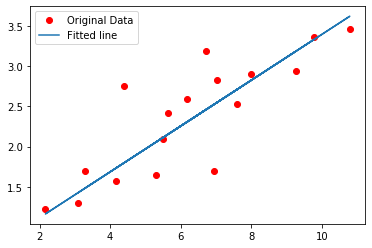

In [34]:
with tf.Session() as sess:
    sess.run(init)
    
    # Fit all training data
    for epoch in range(epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            
        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict={X:train_X,
                                         Y:train_Y})
            print("Epoch: ", epoch + 1, "\t cost = ", c,
                 "\t W=", sess.run(W), "\t b = ", sess.run(b))

    print("Optimizer Finished!\n")
    train_cost = sess.run(cost, feed_dict={X:train_X,
                             Y:train_Y})
    print("Train_cost:", train_cost, "\t W=", sess.run(W), "\t b = ", sess.run(b))
    
    # plot the model
    # 'ro' 绘制的是点，而不是线 
    plt.plot(train_X, train_Y, 'ro', label="Original Data")
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b),
            label="Fitted line")
    plt.legend()
    plt.show()